In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data


,id,prompt,mask,split
0,0,The [MASK] is a neural network architecture co...,Convolutional Neural Network,test
1,1,The ResNet architecture was introduced by Micr...,2015,train
2,2,"In object detection, the [MASK] is a bounding ...",Ground Truth Box,train
3,3,[MASK] is a technique used to augment datasets...,Data Augmentation,val
4,4,The [MASK] problem refers to the difficulty of...,Illumination,train
...,...,...,...,...
292,295,The [MASK] is a type of memory that is used to...,Flash,val
293,296,The [MASK] is a type of hardware that is used ...,GPU,train
294,297,The [MASK] is a type of hardware that is used ...,GPU,train
295,298,The [MASK] is a type of display technology tha...,DLP,train


In [2]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      297 non-null    int64 
 1   prompt  297 non-null    object
 2   mask    297 non-null    object
 3   split   297 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.4+ KB
None
               id
count  297.000000
mean   149.717172
std     87.148527
min      0.000000
25%     74.000000
50%    151.000000
75%    225.000000
max    299.000000


train    237
test      30
val       30
Name: split, dtype: int64
Unique Prompts: 295, Unique Masks: 222


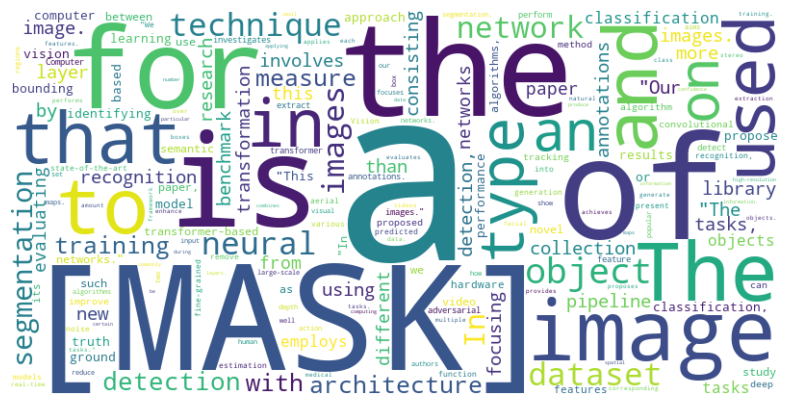

In [3]:
# Check the distribution of the split column
print(data['split'].value_counts())

# Check unique prompts and masks
unique_prompts = data['prompt'].nunique()
unique_masks = data['mask'].nunique()
print(f'Unique Prompts: {unique_prompts}, Unique Masks: {unique_masks}')

# Word frequency analysis on the 'prompt' column
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(data['prompt'])
word_freq = Counter(all_text.split())

# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['processed_prompt'] = data['prompt'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\titik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\titik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\titik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
data

,id,prompt,mask,split,processed_prompt
0,0,The [MASK] is a neural network architecture co...,Convolutional Neural Network,test,[ mask ] neural network architecture commonly ...
1,1,The ResNet architecture was introduced by Micr...,2015,train,resnet architecture introduced microsoft resea...
2,2,"In object detection, the [MASK] is a bounding ...",Ground Truth Box,train,"object detection , [ mask ] bounding box enclo..."
3,3,[MASK] is a technique used to augment datasets...,Data Augmentation,val,[ mask ] technique used augment datasets apply...
4,4,The [MASK] problem refers to the difficulty of...,Illumination,train,[ mask ] problem refers difficulty recognizing...
...,...,...,...,...,...
292,295,The [MASK] is a type of memory that is used to...,Flash,val,[ mask ] type memory used store weight bias ne...
293,296,The [MASK] is a type of hardware that is used ...,GPU,train,[ mask ] type hardware used perform image clas...
294,297,The [MASK] is a type of hardware that is used ...,GPU,train,[ mask ] type hardware used perform real-time ...
295,298,The [MASK] is a type of display technology tha...,DLP,train,[ mask ] type display technology us tiny mirro...


In [6]:
# Split data into train and validation sets based on the 'split' column
train_data = data[data['split'] == 'train']
val_data = data[data['split'] == 'val']


## LSTM MODEL

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
data = pd.read_csv('data.csv')

# Preprocess text data
data['processed_prompt'] = data['prompt'].apply(preprocess_text)

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_prompt'])

# Prepare input sequences
train_sequences = tokenizer.texts_to_sequences(train_data['processed_prompt'])
val_sequences = tokenizer.texts_to_sequences(val_data['processed_prompt'])

max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))

train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
val_padded = pad_sequences(val_sequences, padding='post', maxlen=max_length)

# Prepare target labels
train_labels = tokenizer.texts_to_sequences(train_data['mask'])
val_labels = tokenizer.texts_to_sequences(val_data['mask'])

# Pad labels to the same length as input sequences
train_labels_padded = pad_sequences(train_labels, padding='post', maxlen=max_length)
val_labels_padded = pad_sequences(val_labels, padding='post', maxlen=max_length)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed

# Define LSTM model
model_lstm = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(len(tokenizer.word_index) + 1, activation='softmax'))
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Expand dimensions of labels to match output shape
train_labels_expanded = np.expand_dims(train_labels_padded, axis=-1)
val_labels_expanded = np.expand_dims(val_labels_padded, axis=-1)

# Train the model
model_lstm.fit(train_padded, train_labels_expanded, epochs=10, validation_data=(val_padded, val_labels_expanded))

# Evaluate the model
lstm_loss, lstm_accuracy = model_lstm.evaluate(val_padded, val_labels_expanded)
print(f'LSTM Accuracy: {lstm_accuracy}')

C:\Users\titik\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.5952 - loss: 6.4277 - val_accuracy: 0.9556 - val_loss: 5.7264
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9587 - loss: 5.1546 - val_accuracy: 0.9556 - val_loss: 2.4626
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9617 - loss: 1.9327 - val_accuracy: 0.9556 - val_loss: 0.7911
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9593 - loss: 0.7314 - val_accuracy: 0.9556 - val_loss: 0.5002
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9618 - loss: 0.4767 - val_accuracy: 0.9556 - val_loss: 0.4267
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9626 - loss: 0.3995 - val_accuracy: 0.9556 - val_loss: 0.4019
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9616 - loss: 0.3771 - val_accuracy: 0.9556 - val_loss: 0.3892
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9601 - loss: 0.3519 - val_accuracy: 0.9556 - val_loss: 0.381

## CNN MODEL

In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

data = pd.read_csv('data.csv')

data['processed_prompt'] = data['prompt'].apply(preprocess_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_prompt'])

train_sequences = tokenizer.texts_to_sequences(train_data['processed_prompt'])
val_sequences = tokenizer.texts_to_sequences(val_data['processed_prompt'])

max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))

train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
val_padded = pad_sequences(val_sequences, padding='post', maxlen=max_length)

train_labels = tokenizer.texts_to_sequences(train_data['mask'])
val_labels = tokenizer.texts_to_sequences(val_data['mask'])

train_labels_padded = pad_sequences(train_labels, padding='post', maxlen=max_length)
val_labels_padded = pad_sequences(val_labels, padding='post', maxlen=max_length)

train_labels_expanded = np.expand_dims(train_labels_padded, axis=-1)
val_labels_expanded = np.expand_dims(val_labels_padded, axis=-1)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, TimeDistributed, Dense

# Define CNN model
model_cnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    Conv1D(128, 5, padding='same', activation='relu'),
    Conv1D(128, 5, padding='same', activation='relu'),
    TimeDistributed(Dense(len(tokenizer.word_index) + 1, activation='softmax'))
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(train_padded, train_labels_padded, epochs=10, validation_data=(val_padded, val_labels_padded))

# Evaluate the model
cnn_loss, cnn_accuracy = model_cnn.evaluate(val_padded, val_labels_padded)
print(f'CNN Accuracy: {cnn_accuracy}')


Epoch 1/10


C:\Users\titik\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.6046 - loss: 6.3261 - val_accuracy: 0.9556 - val_loss: 4.2551
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9610 - loss: 3.3442 - val_accuracy: 0.9556 - val_loss: 0.8598
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9587 - loss: 0.5377 - val_accuracy: 0.9556 - val_loss: 0.6316
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9610 - loss: 0.5276 - val_accuracy: 0.9556 - val_loss: 0.6589
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9614 - loss: 0.5037 - val_accuracy: 0.9556 - val_loss: 0.6050
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9605 - loss: 0.4422 - val_accuracy: 0.9556 - val_loss: 0.5147
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9581 - loss: 0.3460 - val_accuracy: 0.9556 - val_loss: 0.5007
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9594 - loss: 0.2967 - val_accuracy: 0.9556 - val_loss: 0.4580
Epoch 9/10

In [11]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, TimeDistributed

data = pd.read_csv('data.csv')

data['processed_prompt'] = data['prompt'].apply(preprocess_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_prompt'])

train_sequences = tokenizer.texts_to_sequences(train_data['processed_prompt'])
val_sequences = tokenizer.texts_to_sequences(val_data['processed_prompt'])

max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))

train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
val_padded = pad_sequences(val_sequences, padding='post', maxlen=max_length)

train_labels = tokenizer.texts_to_sequences(train_data['mask'])
val_labels = tokenizer.texts_to_sequences(val_data['mask'])

train_labels_padded = pad_sequences(train_labels, padding='post', maxlen=max_length)
val_labels_padded = pad_sequences(val_labels, padding='post', maxlen=max_length)

train_labels_expanded = np.expand_dims(train_labels_padded, axis=-1)
val_labels_expanded = np.expand_dims(val_labels_padded, axis=-1)

model_gru = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    GRU(128, return_sequences=True),
    TimeDistributed(Dense(len(tokenizer.word_index) + 1, activation='softmax'))
])

# Compile the model
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_padded, train_labels_expanded, epochs=10, validation_data=(val_padded, val_labels_expanded))

# Evaluate the model
gru_loss, gru_accuracy = model_gru.evaluate(val_padded, val_labels_expanded)
print(f'GRU Accuracy: {gru_accuracy}')


Epoch 1/10


C:\Users\titik\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.5557 - loss: 6.4119 - val_accuracy: 0.9556 - val_loss: 5.7523
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9631 - loss: 5.2878 - val_accuracy: 0.9556 - val_loss: 2.8067
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9582 - loss: 2.0067 - val_accuracy: 0.9556 - val_loss: 0.5800
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9601 - loss: 0.5527 - val_accuracy: 0.9556 - val_loss: 0.4140
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9613 - loss: 0.3841 - val_accuracy: 0.9556 - val_loss: 0.3953
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9625 - loss: 0.3376 - val_accuracy: 0.9556 - val_loss: 0.3889
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9606 - loss: 0.3341 - val_accuracy: 0.9556 - val_loss: 0.3851
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9610 - loss: 0.3184 - val_accuracy: 0.9556 - val_loss: 0.3813
Epoch 9/1

In [19]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizer, TFRobertaForMaskedLM
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [20]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\titik\anaconda3\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\titik\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

C:\Users\titik\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [21]:
# Tokenize and encode sequences
def encode_data(data):
    return tokenizer(
        list(data['processed_prompt']),
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='tf',
        return_attention_mask=True
    )


In [22]:
train_encoded = encode_data(train_data)
val_encoded = encode_data(val_data)

model_roberta = TFRobertaForMaskedLM.from_pretrained('roberta-base')


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForMaskedLM: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


In [30]:
import tensorflow as tfa
model_roberta.compile(optimizer=tfa.optimizers.Adam(learning_rate=5e-5))

In [31]:
train_encoded

{'input_ids': <tf.Tensor: shape=(237, 128), dtype=int32, numpy=
array([[    0, 40412, 12673, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1],
       ...,
       [    0, 49519,   898, ...,     1,     1,     1],
       [    0, 49519,   557, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1]])>, 'attention_mask': <tf.Tensor: shape=(237, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [32]:
val_encoded

{'input_ids': <tf.Tensor: shape=(60, 128), dtype=int32, numpy=
array([[    0, 49519,   646, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1],
       ...,
       [    0, 10975, 11445, ...,     1,     1,     1],
       [    0, 10975, 11445, ...,     1,     1,     1],
       [    0, 49519,  2225, ...,     1,     1,     1]])>, 'attention_mask': <tf.Tensor: shape=(60, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [33]:
model_roberta.fit(
    {'input_ids': train_encoded['input_ids'], 'attention_mask': train_encoded['attention_mask']},
    train_encoded['input_ids'],
    validation_data=({'input_ids': val_encoded['input_ids'], 'attention_mask': val_encoded['attention_mask']}, val_encoded['input_ids']),
    epochs=3,
    batch_size=8
)
roberta_loss = model_roberta.evaluate({'input_ids': val_encoded['input_ids'], 'attention_mask': val_encoded['attention_mask']}, val_encoded['input_ids'])
print(f'RoBERTa Loss: {roberta_loss}')

Epoch 1/3

30/30 [==============================] - 516s 12s/step - loss: 11.0044 - val_loss: 8.8106
Epoch 2/3
30/30 [==============================] - 1029s 35s/step - loss: 7.6500 - val_loss: 6.4104
Epoch 3/3
2/2 [==============================] - 26s 12s/step - loss: 4.6529
RoBERTa Loss: 4.652874946594238


In [35]:
def compute_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int64)  
    pred_ids = tf.argmax(y_pred, axis=-1, output_type=tf.int64)  
    mask = tf.not_equal(y_true, 0) 
    matches = tf.equal(tf.boolean_mask(y_true, mask), tf.boolean_mask(pred_ids, mask))
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    return accuracy.numpy()

val_predictions = model_roberta.predict({'input_ids': val_encoded['input_ids'], 'attention_mask': val_encoded['attention_mask']}).logits
accuracy = compute_accuracy(val_encoded['input_ids'], val_predictions)

print(f'RoBERTa Accuracy: {accuracy}')


2/2 [==============================] - 27s 13s/step
RoBERTa Accuracy: 0.971522331237793


In [39]:
model_roberta.save_weights("C:/Users/titik/GSSOC/")  
